# 투자할 주식 종목을 뽑아주는 노트

In [40]:
import pickle
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot  as plt
import FinanceDataReader as fdr
import warnings

warnings.filterwarnings(action='ignore')

In [49]:
# 확인하면 되는 것들
std_date = '20220325'
N = 1000

DATA_PATH = f'./db_and_model/stock_data_{std_date}_{N}.csv'

In [62]:
def earning_rate(stock_price : list, start_date, end_date):
    '''start_date부터 end_date까지 stock_price데이터를 가지고 수익률을 구해주는 함수(종가 기준)'''
    possible_start_date = stock_price[stock_price.index >= start_date].index[0]
    possible_end_date = stock_price[stock_price.index <= end_date].index[-1]
    
    start_price = stock_price.loc[possible_start_date].Close
    end_price = stock_price.loc[possible_end_date].Close
    
    return (end_price - start_price) / start_price

def preprocess(data_path):
    """데이터 불러오기 + 전처리"""
    raw_data = pd.read_csv(DATA_PATH, encoding='cp949')
    # raw_data = pd.read_csv(DATA_PATH)
    raw_data.drop(raw_data[raw_data['PER'] == 0].index, inplace=True) # PER 0인 종목 제외
    raw_data.drop(raw_data[raw_data['PBR'] == 0].index, inplace=True) # PBR 0인 종목 제외

    return raw_data.reset_index()

def pred(data_path=DATA_PATH):
    raw_data = preprocess(data_path)

    col_names = ["12개월 간 수익률", "KOSPI대비 12개월 간 수익률" , "12개월 간 KOSPI 이김" , 'PER_inv' , 'PBR_inv' , "배당수익률"]
    X = raw_data[col_names]

    MODEL_FILEPATH = './db_and_model/stock_pred_model.pkl'
    with open(MODEL_FILEPATH, 'rb') as pickle_file:
        stock_pred_model = pickle.load(pickle_file)

    y = stock_pred_model.predict_proba(X)[:, 1]
    y = pd.DataFrame(y, columns=['y'])

    # 결과 dataFrame
    res = raw_data.copy()
    res['y'] = y.values

    return res

res = pred()

top_stocks = res.sort_values(by='y', ascending=False).head(50)

top_stocks[['name', 'PER', 'PBR', '12개월 간 수익률', 'y']].reset_index(drop=True)

,name,PER,PBR,12개월 간 수익률,y
0,기업은행,5.51,0.34,0.224719,0.880193
1,BNK금융지주,5.24,0.29,0.198473,0.866681
2,에코프로에이치엔,10000.00,10000.00,0.344505,0.835062
3,한일홀딩스,8.15,0.30,0.183213,0.834015
4,신한지주,6.03,0.49,0.142450,0.833248
5,하나금융지주,5.57,0.48,0.205128,0.817169
6,삼천리,11.62,0.34,0.323892,0.800189
7,유안타증권,7.37,0.56,0.137346,0.799016
8,E1,4.41,0.27,0.082353,0.798721
9,현대해상,7.91,0.58,0.329087,0.795805


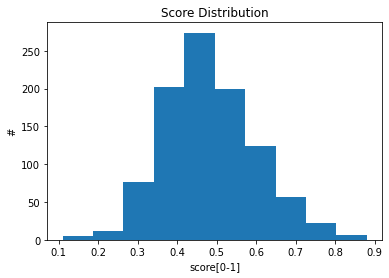

In [43]:
# 점수 분포
fig = plt.figure()
plt.hist(res['y'])
plt.title('Score Distribution')
plt.xlabel('score[0-1]')
plt.ylabel('#')
plt.show()

In [44]:
# 금융주, 우선주 제외
condition2 = ~(res.name.str.contains('지주') | res.name.str.contains('홀딩스')
    | res.name.str.contains('은행') | res.name.str.contains('금융') | res.name.str.contains('보험')
     | res.name.str.contains('증권') | res.name.str.contains('생명') | res.name.str.endswith('우'))

top_stocks_2 = res[condition2].sort_values(by='y', ascending=False).head(50)

top_stocks_2

,index,Unnamed: 0,date,code,12개월 간 수익률,name,KOSPI 12개월 간 수익률,KOSPI대비 12개월 간 수익률,12개월 간 KOSPI 이김,PER,PBR,배당수익률,PER_inv,PBR_inv,y
319,325,325,20220325,383310,0.344505,에코프로에이치엔,-0.088898,0.433403,1,10000.00,10000.00,0.00,0.000100,0.000100,0.835062
527,538,538,20220325,004690,0.323892,삼천리,-0.088898,0.412790,1,11.62,0.34,2.79,0.086059,2.941176,0.800189
712,728,728,20220325,017940,0.082353,E1,-0.088898,0.171251,1,4.41,0.27,4.78,0.226757,3.703704,0.798721
121,122,122,20220325,001450,0.329087,현대해상,-0.088898,0.417985,1,7.91,0.58,3.19,0.126422,1.724138,0.795805
937,957,957,20220325,021320,0.255896,KCC건설,-0.088898,0.344794,1,5.90,0.57,1.69,0.169492,1.754386,0.794489
236,239,239,20220325,003690,0.179641,코리안리,-0.088898,0.268539,1,7.87,0.48,4.57,0.127065,2.083333,0.791649
523,534,534,20220325,377030,0.355497,맥스트,-0.088898,0.444395,1,10000.00,88.53,0.00,0.000100,0.011296,0.760780
614,628,628,20220325,002020,0.278618,코오롱,-0.088898,0.367516,1,2.72,0.56,1.69,0.367647,1.785714,0.747536
92,93,93,20220325,078930,0.055627,GS,-0.088898,0.144526,1,10000.00,0.46,4.66,0.000100,2.173913,0.747171
780,798,798,20220325,003570,0.140940,SNT중공업,-0.088898,0.229838,1,25.84,0.47,3.53,0.038700,2.127660,0.741598


수익률 : -1.9806%


In [39]:
(1.25**2)**7

22.737367544323206